# Importing and Inspecting Data

#### Potential Questions:
1. 	Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?
2. Does the contact employee impact number of sales?
3. Is there a correlation between product category and customer region?
4. Is there a customer region that spends significantly more (or less) money than the others?


### Importing Libraries and Data

We will be working with the dataset stored as `Northwind_small.sqlite` . For reference, the relational structure of this dataset is provided below.
<img src='Northwind_ERD.png'>

In [76]:
# For math & dataframes
import numpy as np
import pandas as pd

# For statistics
import scipy.stats as stats
from itertools import combinations
from scipy.special import comb

# For graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# For SQL database work
import sqlite3

In [2]:
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('Employee',), ('Category',), ('Customer',), ('Shipper',), ('Supplier',), ('Order',), ('Product',), ('OrderDetail',), ('CustomerCustomerDemo',), ('CustomerDemographic',), ('Region',), ('Territory',), ('EmployeeTerritory',)]


### Inspecting tables

Let's take a look at our `Products` table.

In [3]:
c.execute("select * from 'Product';")
product_df = pd.DataFrame(c.fetchall())
product_df.columns = [x[0] for x in c.description]

In [4]:
product_df.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


Let's also look at the `OrderDetail`, `Order`, `Customer`, and `Employee` tables.

In [5]:
c.execute("select * from 'OrderDetail';")
orderdetail_df = pd.DataFrame(c.fetchall())
orderdetail_df.columns = [x[0] for x in c.description]
display(orderdetail_df.head())
print('orderdetail_df\n',orderdetail_df.info())

c.execute("select * from 'Order';")
order_df = pd.DataFrame(c.fetchall())
order_df.columns = [x[0] for x in c.description]
display(order_df.head())
print('order_df\n',order_df.info())

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB
orderdetail_df
 None


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
order_df
 None


In [6]:
c.execute("select * from 'Customer';")
customer_df = pd.DataFrame(c.fetchall())
customer_df.columns = [x[0] for x in c.description]
display(customer_df.head())
print('customer_df\n',customer_df.info())

c.execute("select * from 'Employee';")
employee_df = pd.DataFrame(c.fetchall())
employee_df.columns = [x[0] for x in c.description]
display(employee_df)
print('employee_df\n',employee_df.info())

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
customer_df
 None


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
employee_df
 None


# Question 1:
#### *Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?*

Perhaps the quickest way to answer the first half of our question (whether discounts affect quantity ordered) would be to use a **Welch's T-Test** to compare the mean quantities ordered between two groups (discounts and no discounts).

First, define the functions we'll need to run a Welch's t-test.

In [20]:
def welch_t(a, b):
    """ Calculate Welch's t statistic for two samples. """
    numerator = a.mean() - b.mean()
    denominator = np.sqrt(a.var(ddof=1)/len(a) + b.var(ddof=1)/b.size)
    return abs(numerator/denominator)


def welch_df(a, b):
    """ Calculate the effective degrees of freedom for two samples. """
    num = (a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)**2
    denom = ((a.var(ddof=1)**2) / (((a.size)**2) * (a.size-1))) + ((b.var(ddof=1)**2) / (((b.size)**2) * (b.size-1)))
    return num/denom


def p_value(a, b, two_sided=False):
    """
    Returns the p-value from a Welch's t-test given two datasets (lists, arrays, or series).
    """
    t = welch_t(a,b)
    df = welch_df(a,b)
    p = 1 - stats.t.cdf(t, df)
    if two_sided:
        p += p
    return p

In [56]:
# Create two sample groups, A and B, of quantities ordered
a = orderdetail_df.loc[orderdetail_df.Discount == 0, ['Quantity']].Quantity
b = orderdetail_df.loc[orderdetail_df.Discount != 0, ['Quantity']].Quantity

In [61]:
# look at the percentile breakdown of both samples to determine where to cut off outliers
for q in np.linspace(.9, 1, num=11):
    aq =  round(a.quantile(q=q), 2)
    bq =  round(b.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}\tset2: {}'.format(round(q,2), aq, bq))

0.9th percentile:	set1: 42.0	set2: 55.0
0.91th percentile:	set1: 45.0	set2: 60.0
0.92th percentile:	set1: 50.0	set2: 60.0
0.93th percentile:	set1: 50.0	set2: 60.0
0.94th percentile:	set1: 50.0	set2: 65.0
0.95th percentile:	set1: 55.0	set2: 70.0
0.96th percentile:	set1: 60.0	set2: 70.0
0.97th percentile:	set1: 60.0	set2: 80.0
0.98th percentile:	set1: 70.0	set2: 81.04
0.99th percentile:	set1: 80.0	set2: 100.0
1.0th percentile:	set1: 130.0	set2: 130.0


In [66]:
# Remove outliers (everything beyond 95th percentile)
a1 = orderdetail_df.loc[(orderdetail_df.Discount == 0) & (orderdetail_df.Quantity<=55), ['Quantity']].Quantity
b1 = orderdetail_df.loc[(orderdetail_df.Discount != 0) & (orderdetail_df.Quantity<=70), ['Quantity']].Quantity

Median Quantity Ordered: 	No Discount: 16.0 	Discount: 20.0
Mean Quantity Ordered: 		No Discount: 19.03 	Discount: 24.72
Sample sizes: 			No Discount: 1252 	Discount: 809
Welch's t-test p-value:		 0.0


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


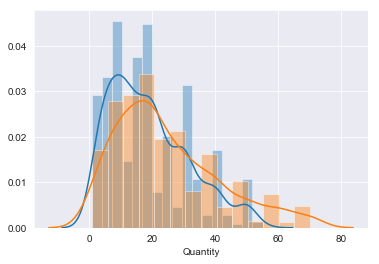

In [93]:
# Plot the distributions
sns.distplot(a1)
sns.distplot(b1);

# Calculate basic statistics and run Welch's t-test on samples
print(f"Median Quantity Ordered: \tNo Discount: {round(a1.median(),2)} \tDiscount: {round(b1.median(),2)}")
print(f"Mean Quantity Ordered: \t\tNo Discount: {round(a1.mean(),2)} \tDiscount: {round(b1.mean(),2)}")
print(f'Sample sizes: \t\t\tNo Discount: {len(a1)} \tDiscount: {len(b1)}')
print("Welch's t-test p-value:\t\t", p_value(a1, b1))

### Analysis

Looking at the sample statistics above, it looks like the presence of a discount on a product's price typically increases the quantity ordered by 4-5 units. Because the p-value from our Welch's t-test is 0.0, we know that there is virtually no chance that the null hypothesis (that discounts do not affect quantities ordered) is true. 

### What about level of discount?

Let's try running this process again, but this time selecting different levels of discount.

In [95]:
# First, discover what the distribution of discount percentages are
orderdetail_df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Median Quantity Ordered: 	Control: 16.0 		0.01 Discount or more: 20.0
Mean Quantity Ordered: 		Control: 19.03 		0.01 Discount or more: 24.72
Sample sizes: 			Control: 1252 		0.01 Discount or more: 809
Welch's t-test p-value:		 0.0 
 
Median Quantity Ordered: 	Control: 16.0 		0.05 Discount or more: 20.0
Mean Quantity Ordered: 		Control: 19.03 		0.05 Discount or more: 24.92
Sample sizes: 			Control: 1252 		0.05 Discount or more: 802
Welch's t-test p-value:		 0.0 
 
Median Quantity Ordered: 	Control: 16.0 		0.1 Discount or more: 20.0
Mean Quantity Ordered: 		Control: 19.03 		0.1 Discount or more: 24.92
Sample sizes: 			Control: 1252 		0.1 Discount or more: 624
Welch's t-test p-value:		 1.9984014443252818e-15 
 
Median Quantity Ordered: 	Control: 16.0 		0.15 Discount or more: 21.0
Mean Quantity Ordered: 		Control: 19.03 		0.15 Discount or more: 25.79
Sample sizes: 			Control: 1252 		0.15 Discount or more: 457
Welch's t-test p-value:		 2.9976021664879227e-15 
 
Median Quantity Ordered: 	Con

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Welch's t-test p-value:		 2.0236620701385988e-07 
 


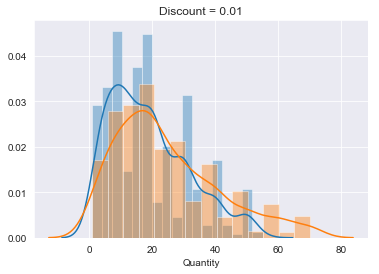

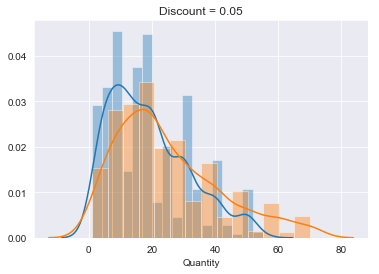

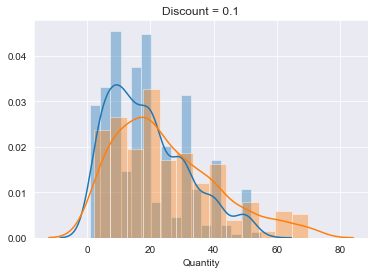

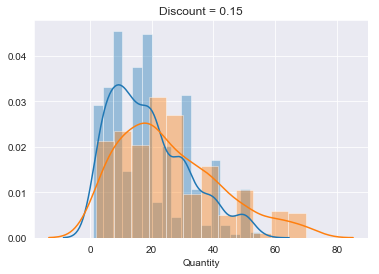

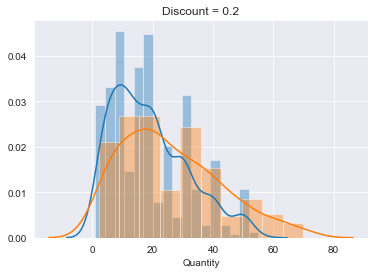

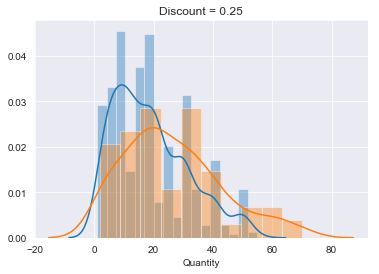

In [112]:
# Based on the above information, let's try iterations grouped 
# by every 5% change in discount.
for percent in [0.01, 0.05, 0.10, 0.15, 0.20, 0.25]:
    a1 = orderdetail_df.loc[(orderdetail_df.Discount == 0) & 
                            (orderdetail_df.Quantity<=55), ['Quantity']].Quantity
    b1 = orderdetail_df.loc[(orderdetail_df.Discount >= percent) & 
                            (orderdetail_df.Quantity<=70), ['Quantity']].Quantity
    print(f"Median Quantity Ordered: \tControl: {round(a1.median(),2)} \t\t{percent} Discount or more: {round(b1.median(),2)}")
    print(f"Mean Quantity Ordered: \t\tControl: {round(a1.mean(),2)} \t\t{percent} Discount or more: {round(b1.mean(),2)}")
    print(f'Sample sizes: \t\t\tControl: {len(a1)} \t\t{percent} Discount or more: {len(b1)}')
    print("Welch's t-test p-value:\t\t", p_value(a1, b1), "\n ")
    plt.figure()
    sns.distplot(a1)
    sns.distplot(b1)
    plt.title(f'Discount = {percent}');

### Analysis

As you can see, we have run several scenarios comparing the control (no discounts) group to sample groups generated by using various lower bound thresholds of discount value. Surprisingly, it seems that the size of the discount itself is almost irrelevant so long as a discount exists at all. A bit more specifically, discounts ranging from 1-10% generally increase the quantity ordered by 6 units, while discounts ranging from 15-25% increase the quantity ordered by 7 units. For all thresholds, the null hypothesis can be rejected with 99.999% confidence or more.